In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [53]:
#Read the dataset using pandas
df = pd.read_csv('training_set_VU_DM.csv')

In [54]:
df_copy = df.copy()
df = df_copy.copy()

In [55]:
pd.set_option('display.max_columns', None)

In [56]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,position,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,4.958347e+06,3.867999e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,317406.000000,3.350565e+06,4.958347e+06,119930.000000,129559.000000,94439.000000,2.024672e+06,2.130269e+06,556238.000000,1.534288e+06,1.650990e+06,472797.000000,307378.000000,343663.000000,1.310860e+05,2.222373e+06,2.360020e+06,841099.000000,240157.000000,260976.000000,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,2.872589e+00,1.303852e-01,4.317913e+00,1.685624e+01,2.542096e+02,2.156198e-01,1.404263e+04,2.385427e+00,3.747417e+01,1.972637e+00,3.504918e-01,1.110525e+00,5.022127e-01,-24.146418,1.301234e+03,2.959004e-01,0.479788,0.031059,244.229916,4.418987e-02,3.931006e-02,18.490732,1.729010e-02,5.776897e-02,27.071559,-0.016543,0.096653,1.753165e+02,2.267621e-02,5.142880e-02,29.851903,0.128329,0.075957,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,1.531011e+00,1.594634e-01,1.834869e+00,1.042566e+01,1.600124e+04,4.112517e-01,8.111843e+03,2.053243e+00,5.199341e+01,8.570628e-01,7.325692e-01,4.172290e-01,4.999952e-01,15.743238,2.023951e+03,4.564465e-01,0.641565,0.229688,1165.448634,4.484236e-01,2.342388e-01,240.113851,4.575808e-01,2.948202e-01,1012.919911,0.578718,0.337165,5.757740e+03,5.217575e-01,2.678363e-01,1340.262382,0.559841,0.302668,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.900000e-02,4.450000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.101000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-30.774775,1.398000e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,7.000000,0.000000,0.0

In [57]:
df = df.drop(['gross_bookings_usd', 'position', 'random_bool', 'date_time'], axis=1)

#### Data quality

In [58]:
# Extreme values - price usd
# Set every value above 10k to missing
df.loc[df['price_usd'] > 10000, 'price_usd'] = np.nan

In [59]:
# Recode - prop_log_historical_price: replace 0 with missing, since 0 is basically missing in this case
df['prop_log_historical_price'] = df['prop_log_historical_price'].replace(0, np.nan)

In [60]:
# Some variables I use later on contain zero, which is problematic for some calculations
# df['price_usd'] = df['price_usd'].values + 0.1
# df['visitor_hist_adr_usd'] = df['visitor_hist_adr_usd'].values + 0.1
# df['prop_review_score'] = df['prop_review_score'].values + 0.1


#### Remove or recode highly missing features

In [61]:
df.isna().mean() * 100

srch_id                         0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.920364
visitor_hist_adr_usd           94.897735
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price      14.397923
price_usd                       0.040195
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
srch_query_affinity_score      93.598552
orig_destination_distance      32.425766
comp1_rate      

In [62]:
# New variables - diff
df["starrating_diff"] = abs(df["visitor_hist_starrating"] - df["prop_starrating"])
df["usd_diff"] = abs(df["visitor_hist_adr_usd"] - df["price_usd"])

In [63]:
# removing missings with >80% missings
df = df.drop(['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score'], axis=1)

In [64]:
# transforming competitor data to reduce missings
df['avg_comp_rate'] = df[['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate']].mean(axis=1)
df['avg_comp_inv'] = df[['comp1_inv', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']].mean(axis=1)
df['avg_comp_ratediff'] = df[['comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 
'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff']].mean(axis=1)

df = df.drop(['comp1_rate', "comp1_inv", 'comp2_rate', "comp2_inv", 'comp3_rate', "comp3_inv", 'comp4_rate', "comp4_inv", 'comp5_rate', "comp5_inv", 'comp6_rate', "comp6_inv", 'comp7_rate', "comp7_inv", 'comp8_rate', "comp8_inv",
              'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff'], axis = 1)


In [65]:
missing_percentages = df[df.columns[df.isna().any()]].isna().mean() * 100
missing_percentages = missing_percentages[missing_percentages > 0]
print(missing_percentages)

prop_review_score             0.148517
prop_location_score2         21.990151
prop_log_historical_price    14.397923
price_usd                     0.040195
orig_destination_distance    32.425766
starrating_diff              94.920364
usd_diff                     94.897775
avg_comp_rate                34.624604
avg_comp_inv                 32.389282
avg_comp_ratediff            68.124659
dtype: float64


In [66]:
# avg_comp_ratediff is still very highly missing and doesnt really capture anything the other competitor variables dont already capture
# so we remove it
df = df.drop(['avg_comp_ratediff'], axis=1)

#### Importance of prop missings

C:\Users\jeroe\AppData\Local\Temp\ipykernel_18772\2689979187.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = df.groupby('prop_missing_bool')['click_bool', 'booking_bool'].mean().reset_index()


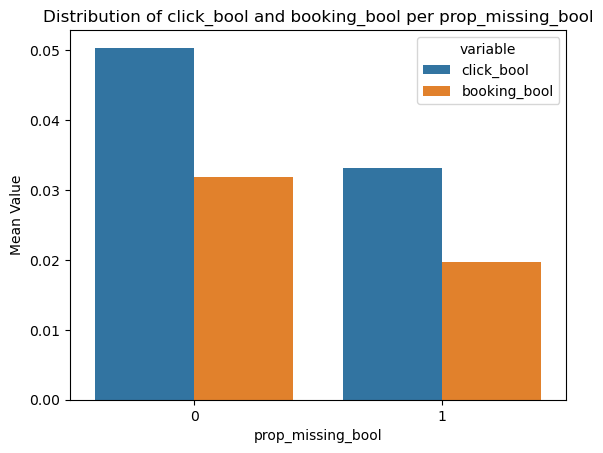

In [67]:
# There seems to be some importance in the missings of property features. So we can add a boolean variable to the dataset.
cols = ['prop_review_score', 'prop_location_score2', 'prop_log_historical_price']

# Check if any variable is missing for each row
df['prop_missing_bool'] = df[cols].isnull().any(axis=1).astype(int)

# Group the data by 'prop_missing_bool' and calculate the mean of 'click_bool' and 'booking_bool'
grouped_data = df.groupby('prop_missing_bool')['click_bool', 'booking_bool'].mean().reset_index()

# Plot the bar chart
sns.barplot(x='prop_missing_bool', y='value', hue='variable', data=pd.melt(grouped_data, id_vars=['prop_missing_bool'], value_vars=['click_bool', 'booking_bool']))
plt.xlabel('prop_missing_bool')
plt.ylabel('Mean Value')
plt.title('Distribution of click_bool and booking_bool per prop_missing_bool')
plt.show()

#### Impute missings

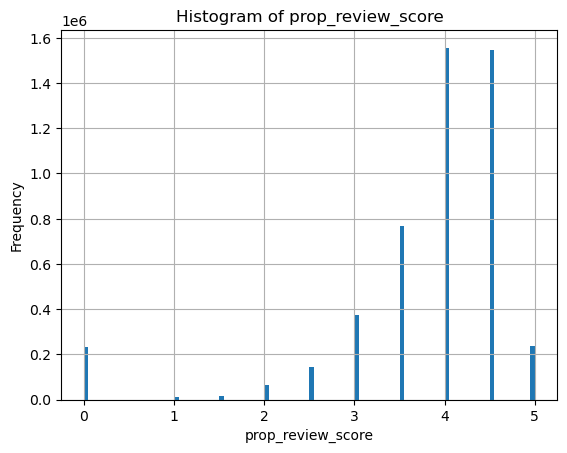

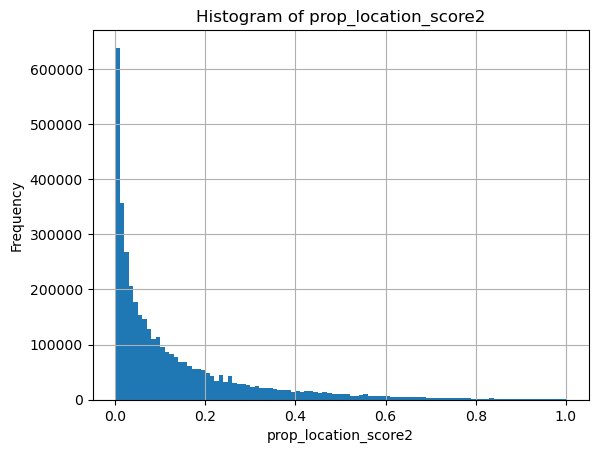

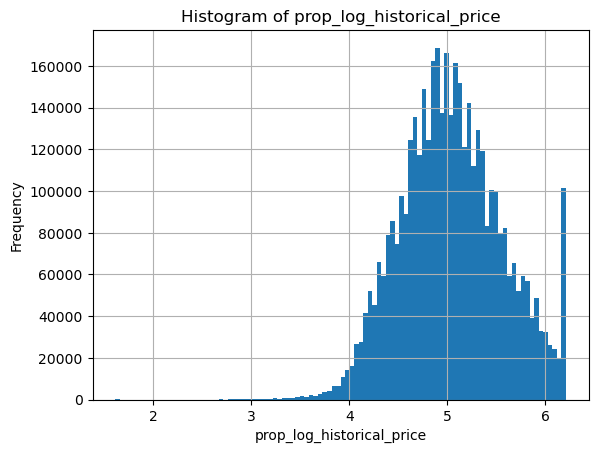

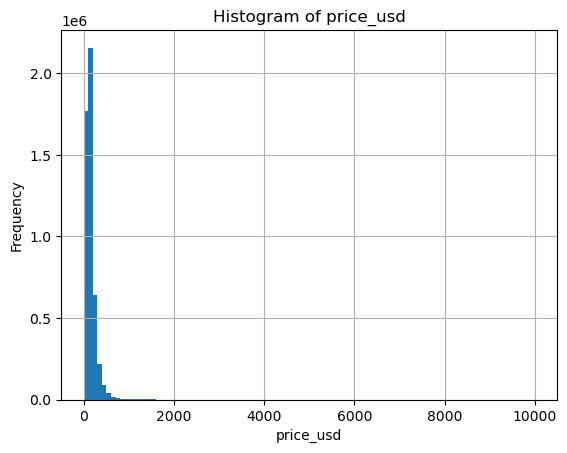

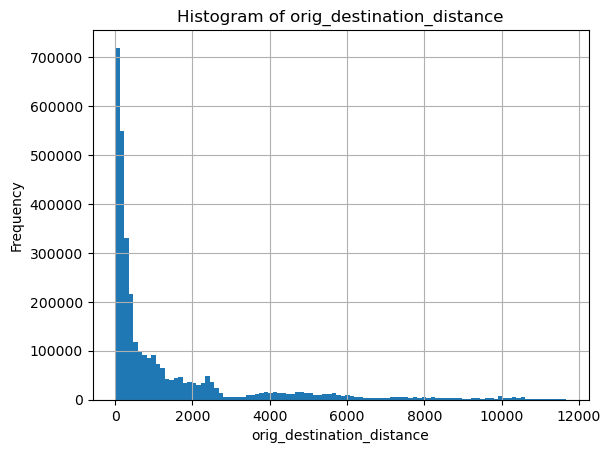

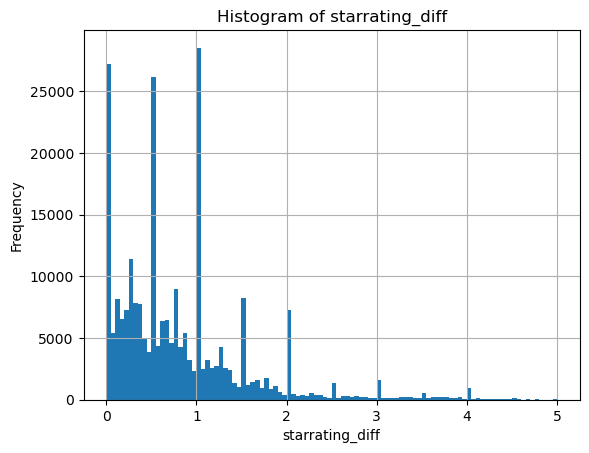

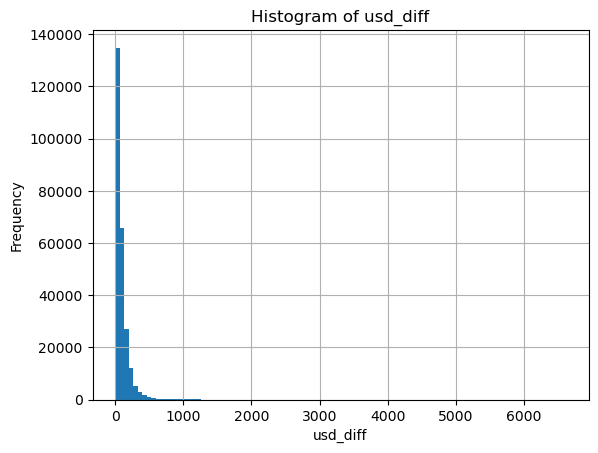

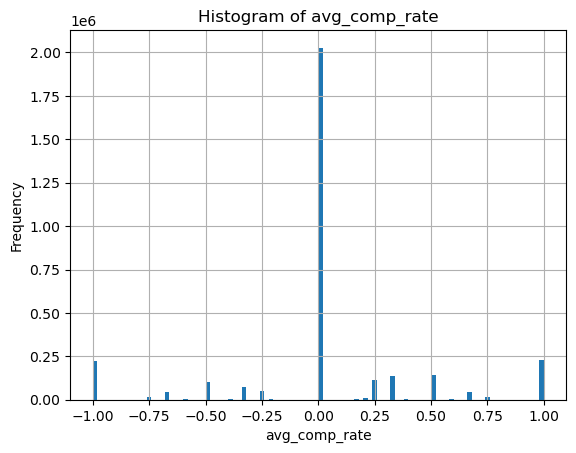

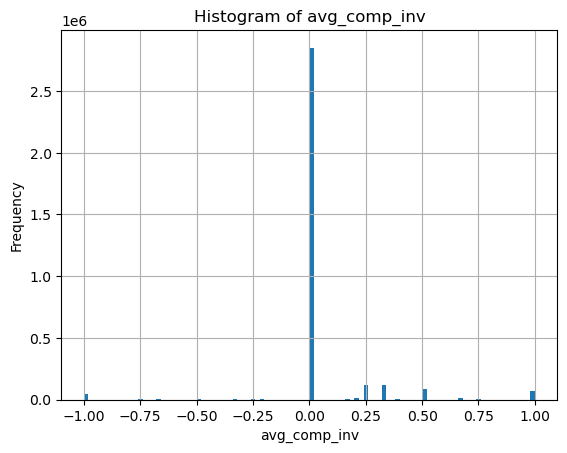

In [68]:
# impute missings based on distribution
# Select columns with missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()

# Loop through columns to plot
for col in df[cols_with_missing]:
    plt.figure()
    df[col].hist(bins=100)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

In [69]:
# orig_destination_distance: impute based on average of 'orig_destination_distance' per combination of country_id and visitor_location_country_id
# Calculate the average per combination of country_id and visitor_location_country_id
average_distance = df.groupby(['prop_country_id', 'visitor_location_country_id'])['orig_destination_distance'].transform('mean')
df['orig_destination_distance'] = df['orig_destination_distance'].fillna(average_distance) # Impute missing values with the average distance

# Replace missings with corresponding medians. 
df[['prop_review_score', 'prop_log_historical_price', 'price_usd']] = df[['prop_review_score', 'prop_log_historical_price', 'price_usd']].fillna(df[['prop_review_score', 'prop_log_historical_price', 'price_usd']].median())

# Replace missings with minimum. Note orig_destination_distance still had some missings, so we impute the rest based on minimum
df[['prop_location_score2', 'orig_destination_distance']] = df[['prop_location_score2', 'orig_destination_distance']].fillna(df[['prop_location_score2', 'orig_destination_distance']].min())

# Replace missings with zero. 
df[['avg_comp_rate','avg_comp_inv']] = df[['avg_comp_rate','avg_comp_inv']].replace(np.nan, 0)

In [70]:
# get dummies for usd_diff, starrating_diff
dummy_cols = dummy_cols = ['starrating_diff', 'usd_diff']
# Loop through selected columns and apply binning
for col in dummy_cols:
    bins = [-np.inf, df[col].quantile(0.50), np.inf]
    labels = ['low', 'high']
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
df = pd.get_dummies(df, columns=dummy_cols, dummy_na=True)

In [71]:
df.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,click_bool,booking_bool,avg_comp_rate,avg_comp_inv,prop_missing_bool,starrating_diff_low,starrating_diff_high,starrating_diff_nan,usd_diff_low,usd_diff_high,usd_diff_nan
0,1,12,187,219,893,3,3.5,1,2.83,0.0438,4.95,104.77,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.000000,0,0,0,1,0,0,1
1,1,12,187,219,10404,4,4.0,1,2.20,0.0149,5.03,170.74,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.333333,0,0,0,1,0,0,1
2,1,12,187,219,21315,3,4.5,1,2.20,0.0245,4.92,179.80,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.000000,0,0,0,1,0,0,1
3,1,12,187,219,27348,2,4.0,1,2.83,0.0125,4.39,602.77,0,23246,1,0,4,0,1,1,0.01,0,0,-0.75,0.250000,0,0,0,1,0,0,1
4,1,12,187,219,29604,4,3.5,1,2.64,0.1241,4.93,143.58,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.000000,0,0,0,1,0,0,1


In [72]:
# No more missings
df.isna().mean() * 100

srch_id                        0.0
site_id                        0.0
visitor_location_country_id    0.0
prop_country_id                0.0
prop_id                        0.0
prop_starrating                0.0
prop_review_score              0.0
prop_brand_bool                0.0
prop_location_score1           0.0
prop_location_score2           0.0
prop_log_historical_price      0.0
price_usd                      0.0
promotion_flag                 0.0
srch_destination_id            0.0
srch_length_of_stay            0.0
srch_booking_window            0.0
srch_adults_count              0.0
srch_children_count            0.0
srch_room_count                0.0
srch_saturday_night_bool       0.0
orig_destination_distance      0.0
click_bool                     0.0
booking_bool                   0.0
avg_comp_rate                  0.0
avg_comp_inv                   0.0
prop_missing_bool              0.0
starrating_diff_low            0.0
starrating_diff_high           0.0
starrating_diff_nan 

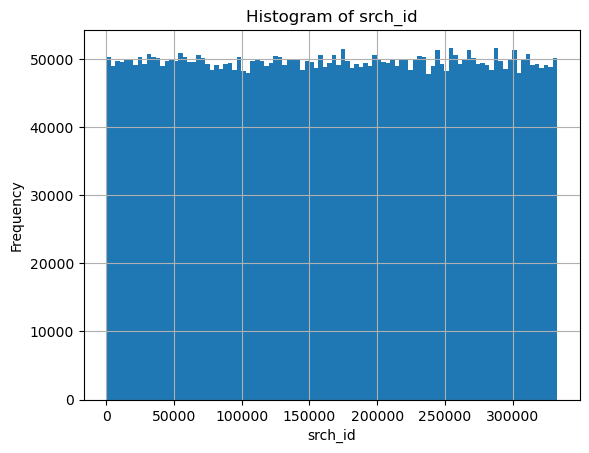

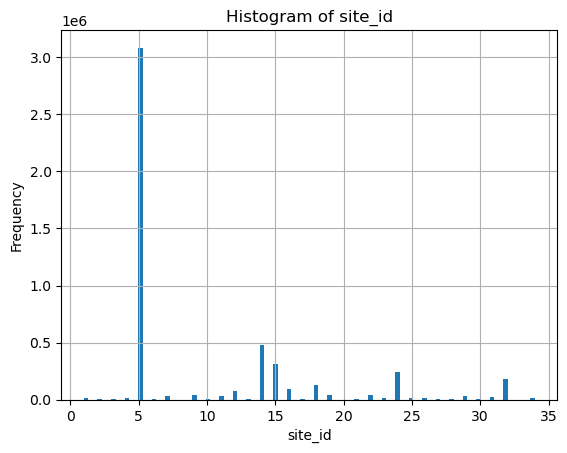

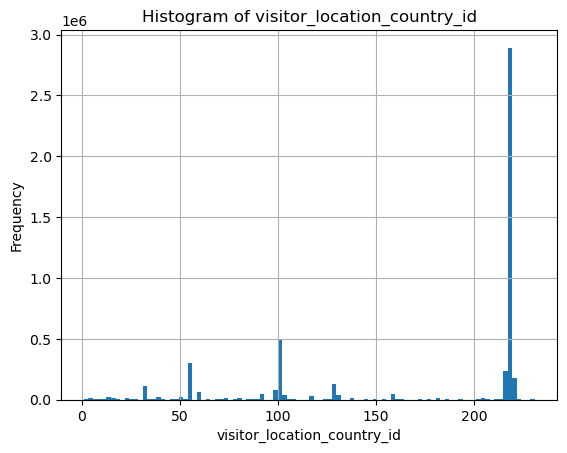

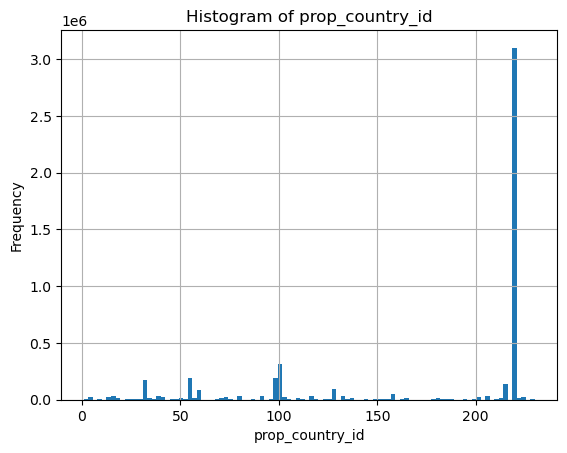

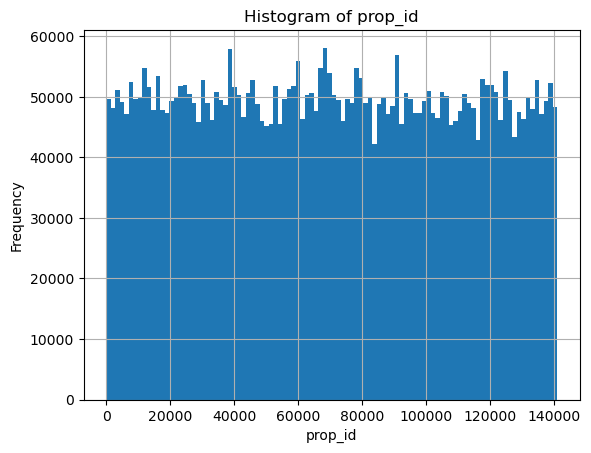

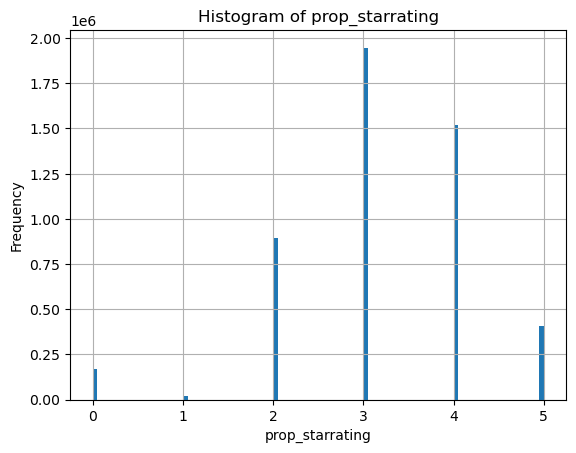

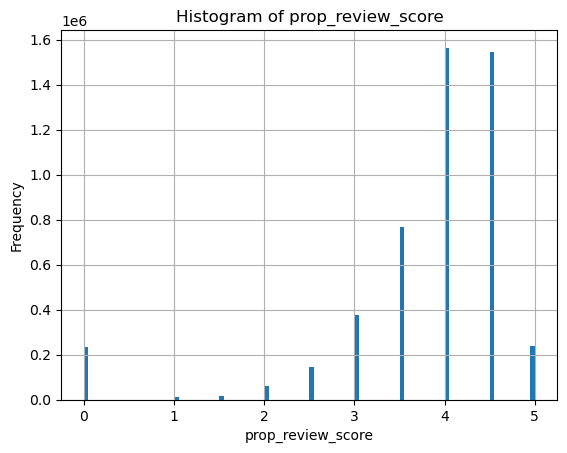

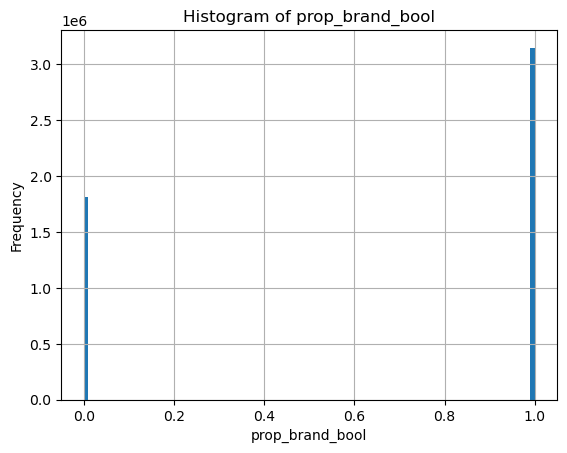

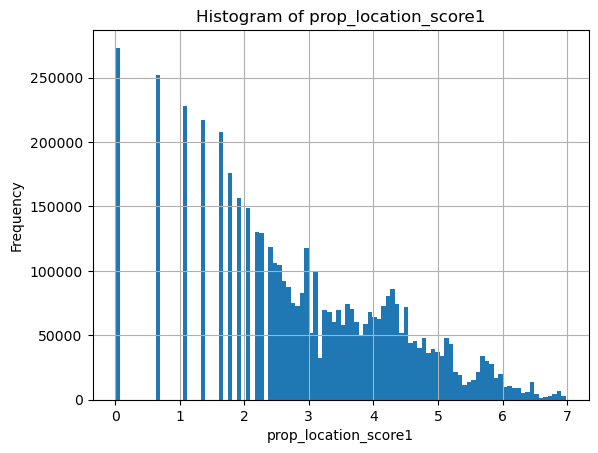

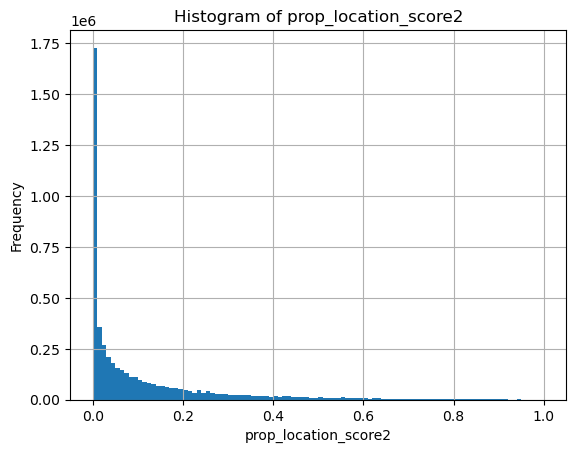

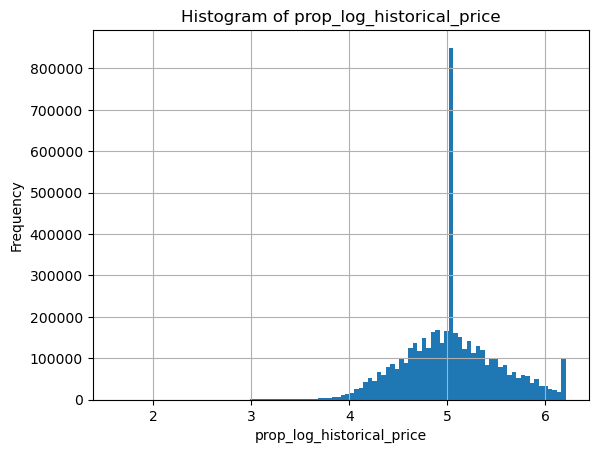

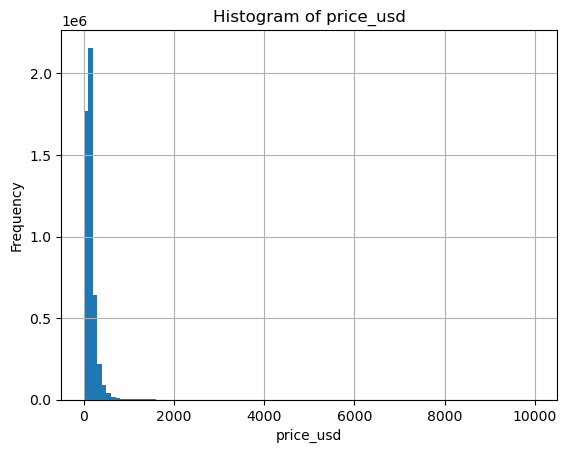

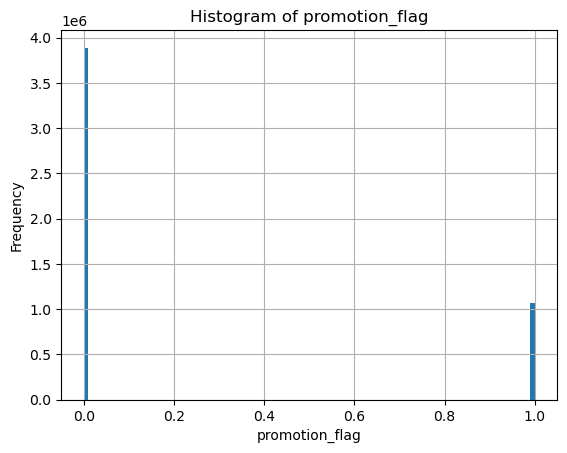

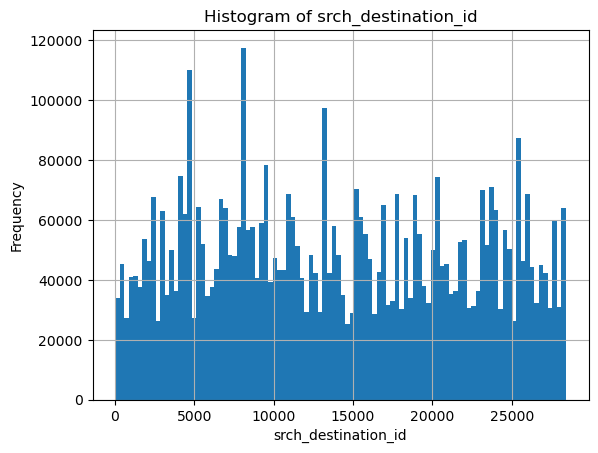

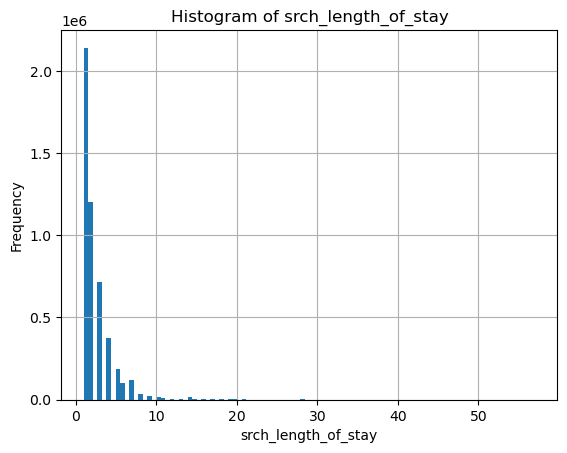

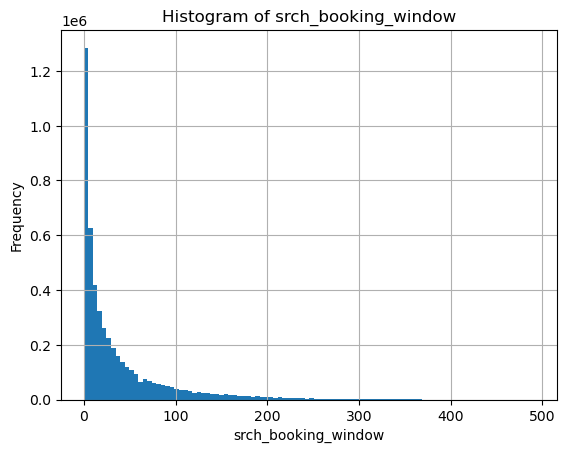

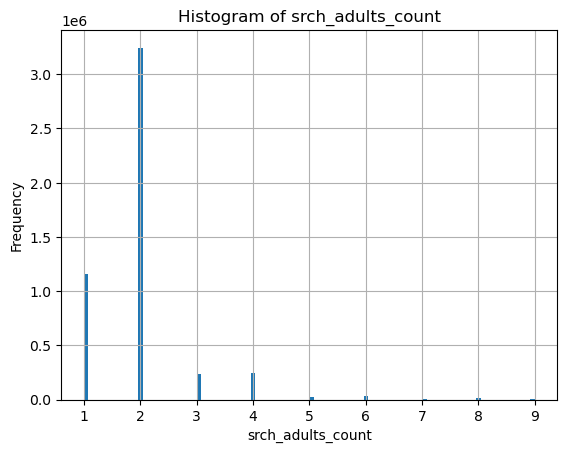

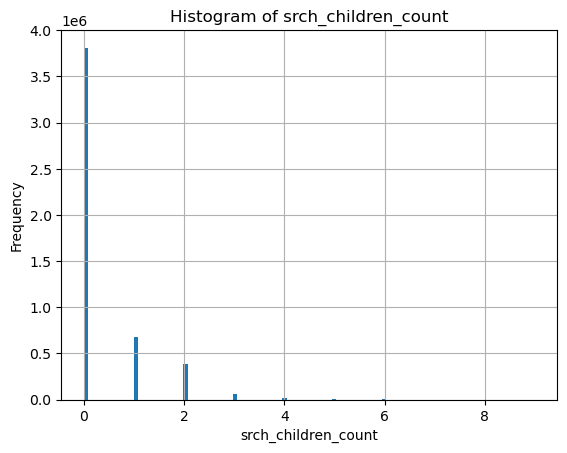

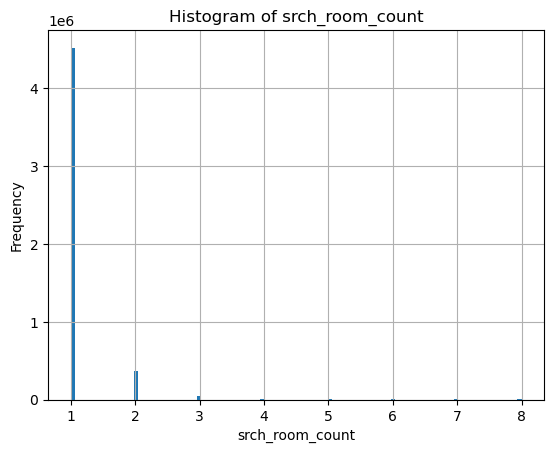

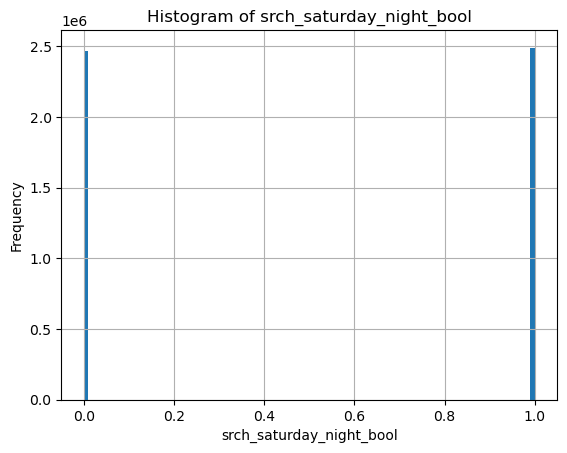

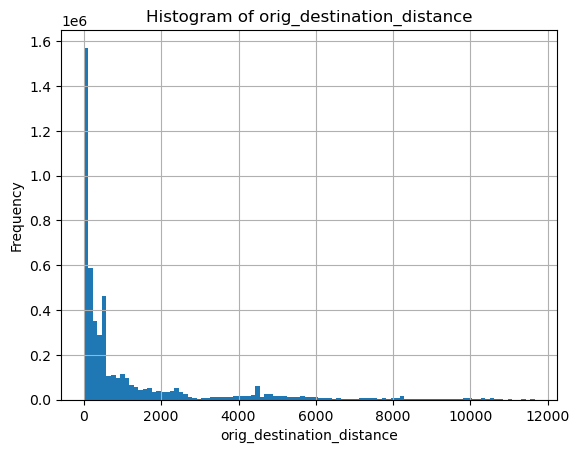

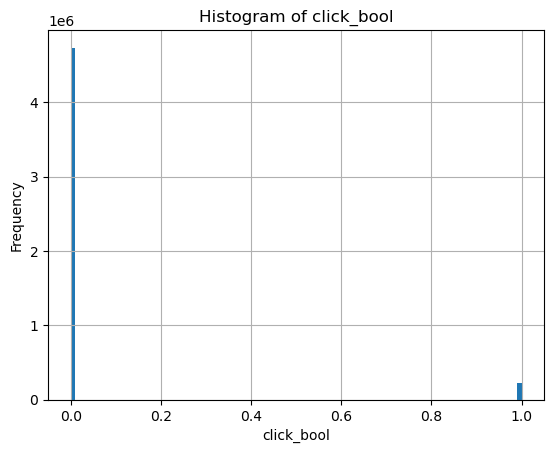

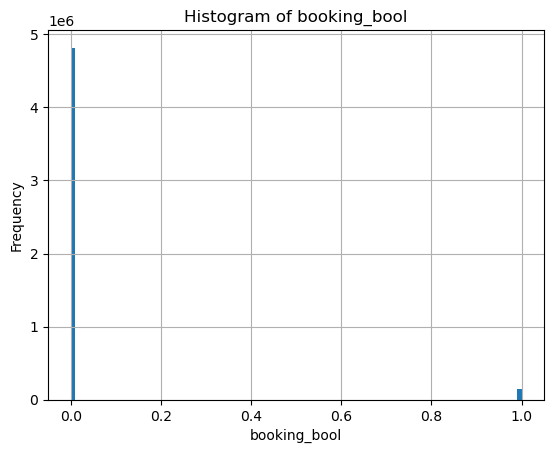

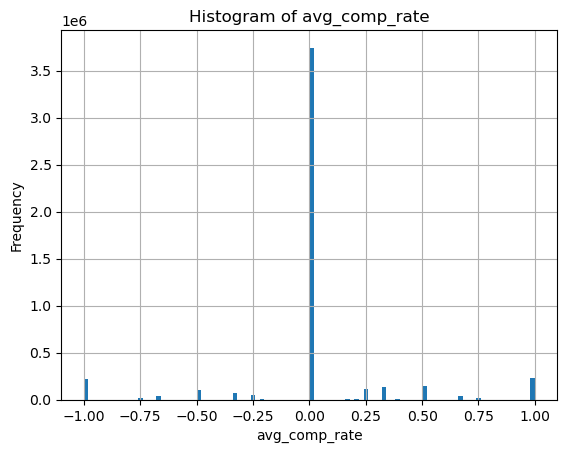

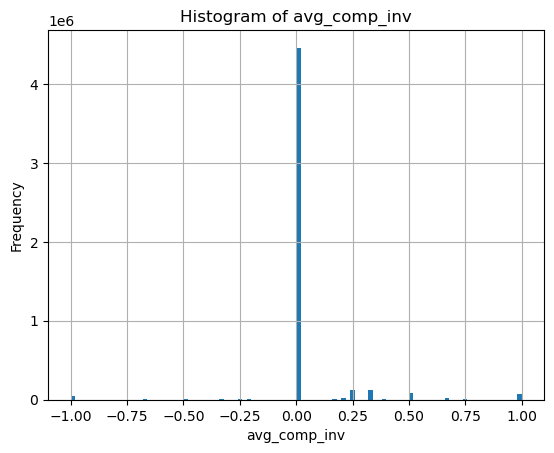

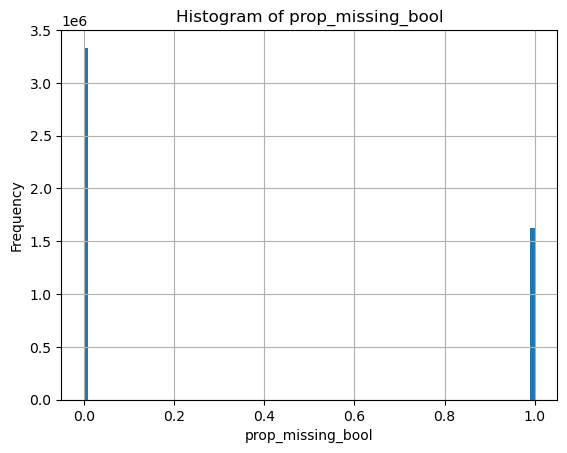

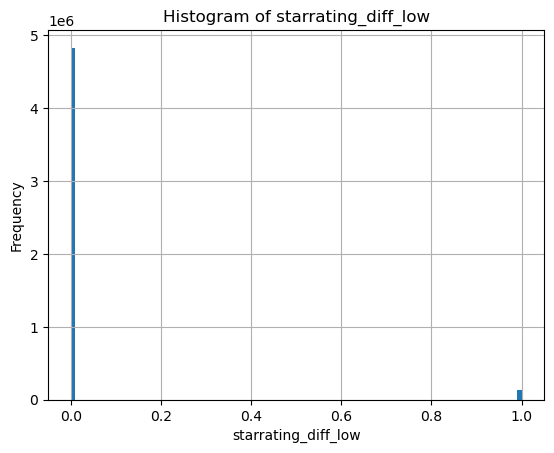

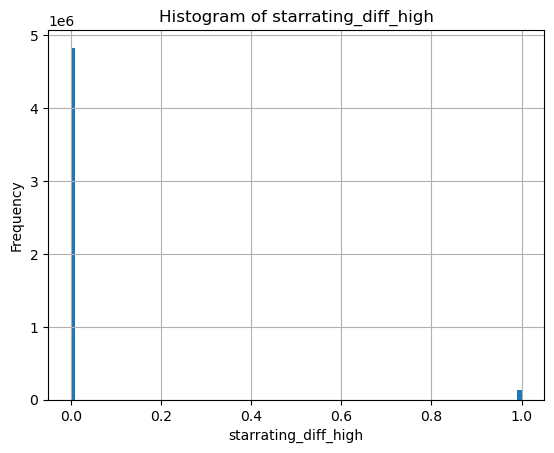

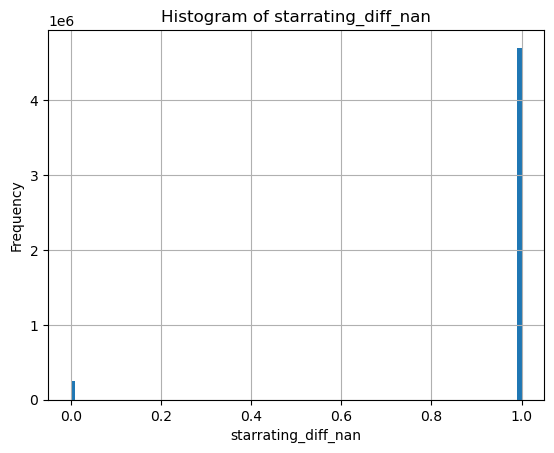

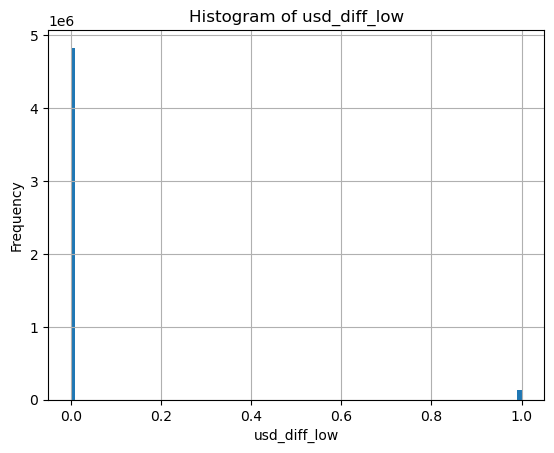

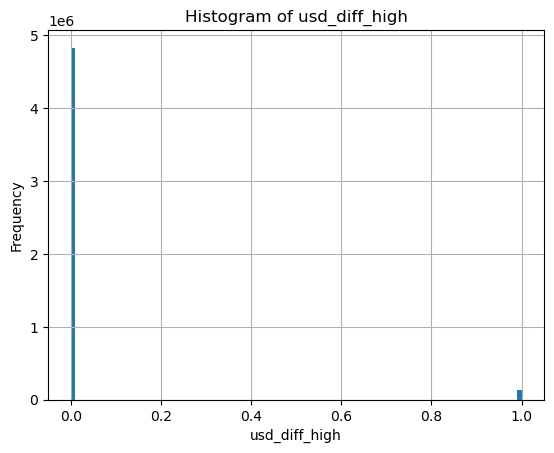

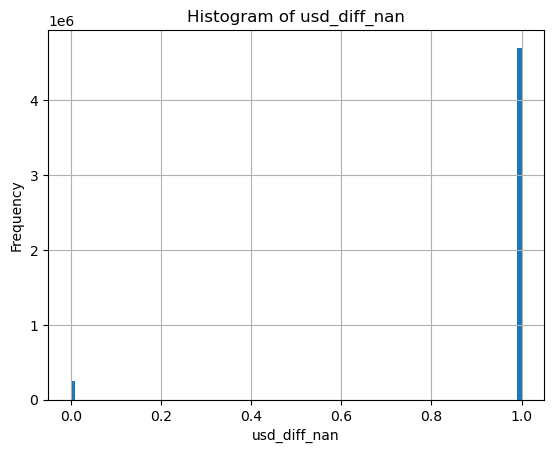

In [73]:
# Distributions look good
# Loop through columns to plot
for col in df.columns:
    if col != 'date_time':
        plt.figure()
        df[col].hist(bins=100)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {col}')
        plt.show()


#### Feature engineering - new features

In [74]:
# average values per property id
columns = ['prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'orig_destination_distance']

for column in columns:
    new_column_name = f"avg_{column}_propid"
    df[new_column_name] = df.groupby('prop_id')[column].transform('mean')



In [75]:
# Rank_price
# We can create a variable that captures the rank within certain queries based on price and quality.
df['index_queryprice'] = df.groupby('srch_id')['price_usd'].transform(lambda x: x / x.mean())
df.loc[df['index_queryprice'] > 5, 'index_queryprice'] = 5

df['index_destinationprice'] = df.groupby('srch_destination_id')['price_usd'].transform(lambda x: x / x.mean()) 
df.loc[df['index_destinationprice'] > 5, 'index_destinationprice'] = 5

epsilon = 1e-8  # Small constant to avoid division by zero
df['index_queryquality'] = df.groupby('srch_id')['prop_starrating'].transform(lambda x: x / (x.mean() + epsilon))
df.loc[df['index_queryquality'] > 5, 'index_queryquality'] = 5

df['index_queryreview'] = df.groupby('srch_id')['prop_review_score'].transform(lambda x: x / (x.mean() + epsilon))
df.loc[df['index_queryreview'] > 5, 'index_queryreview'] = 5


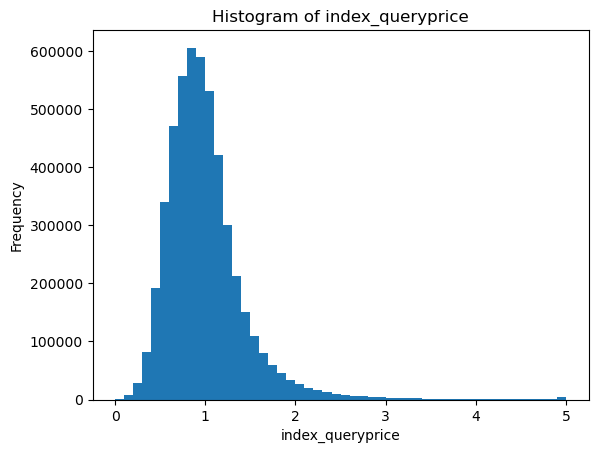

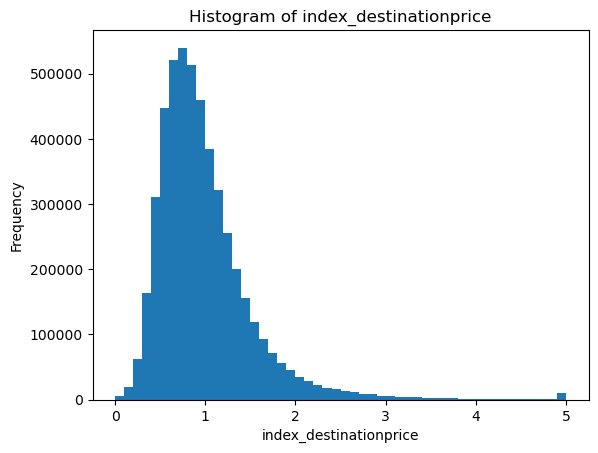

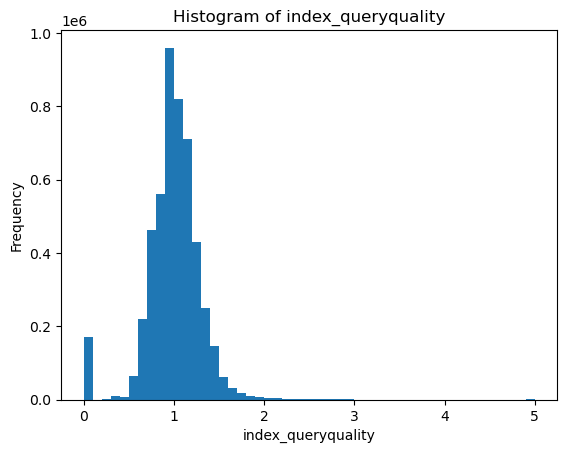

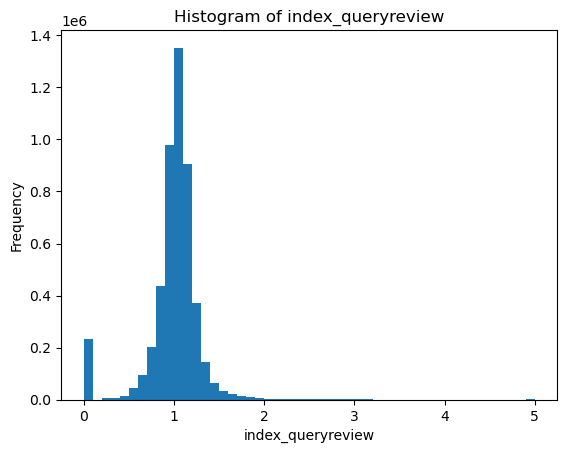

In [76]:
import matplotlib.pyplot as plt

# Plot histogram for 'index_queryprice'
plt.hist(df['index_queryprice'], bins=50)
plt.xlabel('index_queryprice')
plt.ylabel('Frequency')
plt.title('Histogram of index_queryprice')
plt.show()

# Plot histogram for 'index_destinationprice'
plt.hist(df['index_destinationprice'], bins=50)
plt.xlabel('index_destinationprice')
plt.ylabel('Frequency')
plt.title('Histogram of index_destinationprice')
plt.show()

# Plot histogram for 'index_queryreview'
plt.hist(df['index_queryquality'], bins=50)
plt.xlabel('index_queryquality')
plt.ylabel('Frequency')
plt.title('Histogram of index_queryquality')
plt.show()

# Plot histogram for 'index_queryreview'
plt.hist(df['index_queryreview'], bins=50)
plt.xlabel('index_queryreview')
plt.ylabel('Frequency')
plt.title('Histogram of index_queryreview')
plt.show()


In [77]:
df.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,click_bool,booking_bool,avg_comp_rate,avg_comp_inv,prop_missing_bool,starrating_diff_low,starrating_diff_high,starrating_diff_nan,usd_diff_low,usd_diff_high,usd_diff_nan,avg_prop_log_historical_price_propid,avg_price_usd_propid,avg_promotion_flag_propid,avg_srch_destination_id_propid,avg_srch_length_of_stay_propid,avg_srch_booking_window_propid,avg_srch_adults_count_propid,avg_srch_children_count_propid,avg_srch_room_count_propid,avg_srch_saturday_night_bool_propid,avg_orig_destination_distance_propid,index_queryprice,index_destinationprice,index_queryquality,index_queryreview
0,1,12,187,219,893,3,3.5,1,2.83,0.0438,4.95,104.77,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.000000,0,0,0,1,0,0,1,4.972042,118.758742,0.099673,21150.903595,1.642157,29.918301,1.911765,0.313725,1.145425,0.467320,1706.539504,0.639938,0.783379,0.976744,1.005128
1,1,12,187,219,10404,4,4.0,1,2.20,0.0149,5.03,170.74,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.333333,0,0,0,1,0,0,1,5.028576,152.054082,0.051458,21558.257290,1.656947,28.221269,1.893654,0.339623,1.149228,0.542024,1630.855136,1.042885,1.276645,1.302326,1.148718
2,1,12,187,219,21315,3,4.5,1,2.20,0.0245,4.92,179.80,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.000000,0,0,0,1,0,0,1,4.940581,168.540871,0.000000,21745.324864,1.626134,32.147005,1.905626,0.364791,1.141561,0.542650,1684.791374,1.098224,1.344388,0.976744,1.292308
3,1,12,187,219,27348,2,4.0,1,2.83,0.0125,4.39,602.77,0,23246,1,0,4,0,1,1,0.01,0,0,-0.75,0.250000,0,0,0,1,0,0,1,4.456022,82.598870,0.230435,22617.043478,1.552174,31.932609,1.791304,0.223913,1.073913,0.441304,1609.837857,3.681737,4.506988,0.651163,1.148718
4,1,12,187,219,29604,4,3.5,1,2.64,0.1241,4.93,143.58,0,23246,1,0,4,0,1,1,0.01,0,0,0.00,0.000000,0,0,0,1,0,0,1,4.930256,120.870692,0.203008,20465.757895,1.658647,31.258647,1.930827,0.327820,1.130827,0.496241,1704.580507,0.876991,1.073566,1.302326,1.005128


In [78]:
# # Calculate the count of each 'prop_id'
# prop_counts = df['prop_id'].value_counts()

# # Calculate prop_CTR
# df['prop_CTR'] = df.groupby('prop_id')['click_bool'].transform(lambda x: x.sum() / prop_counts[x.name])

# # Calculate prop_BTR
# df['prop_BTR'] = df.groupby('prop_id')['booking_bool'].transform(lambda x: x.sum() / prop_counts[x.name])


In [79]:
# # Save the 'prop_id' and 'prop_BTR' variables to a CSV file
# df[['prop_id', 'prop_BTR']].to_csv('prop_BTR.csv', index=False)
# # Save the 'prop_id' and 'prop_BTR' variables to a CSV file
# df[['prop_id', 'prop_CTR']].to_csv('prop_CTR.csv', index=False)

In [80]:
# import matplotlib.pyplot as plt

# # Plot histograms
# plt.figure(figsize=(12, 6))

# # Histogram for 'prop_CTR'
# plt.subplot(1, 2, 1)
# plt.hist(df['prop_CTR'], bins=50)
# plt.xlabel('prop_CTR')
# plt.ylabel('Frequency')

# # Histogram for 'prop_BTR'
# plt.subplot(1, 2, 2)
# plt.hist(df['prop_BTR'], bins=50)
# plt.xlabel('prop_BTR')
# plt.ylabel('Frequency')

# # Adjust spacing between subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

In [81]:
# # New variables - abroad
# df['abroad_bool'] = (df['visitor_location_country_id'] != df['prop_country_id']).astype(int)

# # New variables - children
# df['children_bool'] = (df['srch_children_count'] > 0).astype(int)

#### Feature engineering - data transformation

In [82]:
# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Specify the columns to be excluded from normalization
columns_to_exclude = ['srch_id', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'srch_destination_id']

# Get the columns to be normalized by excluding the columns to exclude
columns_to_normalize = [col for col in df.columns if col not in columns_to_exclude]

# Apply Min-Max scaling to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [83]:
df.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,click_bool,booking_bool,avg_comp_rate,avg_comp_inv,prop_missing_bool,starrating_diff_low,starrating_diff_high,starrating_diff_nan,usd_diff_low,usd_diff_high,usd_diff_nan,avg_prop_log_historical_price_propid,avg_price_usd_propid,avg_promotion_flag_propid,avg_srch_destination_id_propid,avg_srch_length_of_stay_propid,avg_srch_booking_window_propid,avg_srch_adults_count_propid,avg_srch_children_count_propid,avg_srch_room_count_propid,avg_srch_saturday_night_bool_propid,avg_orig_destination_distance_propid,index_queryprice,index_destinationprice,index_queryquality,index_queryreview
count,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,1.739739e+02,7.007918e+04,6.361051e-01,7.556214e-01,6.346994e-01,4.115456e-01,1.017133e-01,7.458020e-01,1.557380e-02,2.156198e-01,1.404263e+04,2.473978e-02,7.616700e-02,1.215797e-01,3.894353e-02,1.578928e-02,5.022127e-01,9.704013e-02,4.474858e-02,2.791051e-02,5.064111e-01,5.144641e-01,3.277256e-01,2.551697e-02,2.527939e-02,9.492036e-01,2.551112e-02,2.551112e-02,9.489778e-01,6.804794e-01,1.525217e-02,2.156198e-01,4.944228e-01,2.473978e-02,9.073648e-02,1.215797e-01,7.788707e-02,1.578928e-02,5.022127e-01,9.740230e-02,1.997663e-01,1.978833e-01,1.999547e-01,1.999721e-01
std,9.611223e+04,7.646890e+00,6.591625e+01,6.834525e+01,4.060992e+04,2.102047e-01,2.099167e-01,4.815144e-01,2.193426e-01,1.508413e-01,1.044625e-01,1.616115e-02,4.112517e-01,8.111843e+03,3.666505e-02,1.056777e-01,1.071328e-01,8.139658e-02,5.960414e-02,4.999952e-01,1.667257e-01,2.067514e-01,1.647165e-01,1.748955e-01,9.215288e-02,4.693842e-01,1.576891e-01,1.569724e-01,2.195817e-01,1.576715e-01,1.576715e-01,2.200431e-01,1.196729e-01,1.039721e-02,3.125482e-01,1.839368e-01,1.588689e-02,4.518756e-02,2.434498e-02,4.791286e-02,1.085390e-02,1.282194e-01,6.957587e-02,8.785315e-02,1.080999e-01,6.110494e-02,6.069961e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,1.000000e+02,3.501000e+04,6.000000e-01,7.000000e-01,0.000000e+00,2.564470e-01,1.400000e-03,6.826087e-01,8.500000e-03,0.000000e+00,7.101000e+03,0.000000e+00,8.130081e-03,1.250000e-01,0.000000e+00,0.000000e+00,0.000000e+00,6.624021e-03,0.000000e+00,0.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.987196e-01,9.118204e-03,0.000000e+00,3.551485e-01,1.404035e-02,5.843897e-02,1.077982e-01,4.732510e-02,9.909166e-03,4.347826e-01,4.791515e-02,1.444865e-01,

#### Feature selection

In [84]:
# Dropping irrelevant features
df = df.drop(['site_id','visitor_location_country_id', 'prop_country_id', 'srch_destination_id'], axis=1)
df.columns

Index(['srch_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'click_bool', 'booking_bool',
       'avg_comp_rate', 'avg_comp_inv', 'prop_missing_bool',
       'starrating_diff_low', 'starrating_diff_high', 'starrating_diff_nan',
       'usd_diff_low', 'usd_diff_high', 'usd_diff_nan',
       'avg_prop_log_historical_price_propid', 'avg_price_usd_propid',
       'avg_promotion_flag_propid', 'avg_srch_destination_id_propid',
       'avg_srch_length_of_stay_propid', 'avg_srch_booking_window_propid',
       'avg_srch_adults_count_propid', 'avg_srch_children_count_propid',
       'avg_srch_room_count_propid', 'avg_srch_saturday_night_bool_propid',
       'avg_or

In [85]:
df['booking_bool'] = df['booking_bool'].astype(int)

book_indices = df[df['booking_bool'] == 1].index
random_indices = np.random.choice(book_indices, len(df.loc[df['booking_bool'] == 1]), replace=False)
book_sample = df.loc[random_indices]

not_book = df[df['booking_bool'] == 0].index
random_indices = np.random.choice(not_book, sum(df['booking_bool']), replace=False)
not_book_sample = df.loc[random_indices]

df_fs = pd.concat([not_book_sample, book_sample], axis=0)

print("Non-book impressions: ", len(df_fs[df_fs['booking_bool'] == 0]))
print("book impression: ", len(df_fs[df_fs['booking_bool'] == 1]))
print("Total number of records in resampled data: ", len(df_fs))

Non-book impressions:  138390
book impression:  138390
Total number of records in resampled data:  276780


In [86]:
df_fs

,srch_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,orig_destination_distance,click_bool,booking_bool,avg_comp_rate,avg_comp_inv,prop_missing_bool,starrating_diff_low,starrating_diff_high,starrating_diff_nan,usd_diff_low,usd_diff_high,usd_diff_nan,avg_prop_log_historical_price_propid,avg_price_usd_propid,avg_promotion_flag_propid,avg_srch_destination_id_propid,avg_srch_length_of_stay_propid,avg_srch_booking_window_propid,avg_srch_adults_count_propid,avg_srch_children_count_propid,avg_srch_room_count_propid,avg_srch_saturday_night_bool_propid,avg_orig_destination_distance_propid,index_queryprice,index_destinationprice,index_queryquality,index_queryreview
3535385,237385,62417,0.8,0.9,1.0,0.565903,0.0991,0.841304,0.012400,0.0,0.000000,0.004065,0.125,0.000000,0.000000,1.0,0.000303,0.0,0,0.50,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.779774,0.019509,0.054326,0.572078,0.022025,0.074929,0.126761,0.062598,0.012647,0.603622,0.071318,0.200098,0.146008,0.220000,0.215217
3842573,257951,123405,0.6,0.0,0.0,0.000000,0.0000,0.667391,0.012484,0.0,0.000000,0.268293,0.125,0.000000,0.000000,1.0,0.009498,0.0,0,0.50,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.603458,0.011367,0.235294,0.604118,0.005252,0.113659,0.110294,0.013072,0.016807,0.764706,0.037317,0.201698,0.245897,0.203774,0.000000
3662856,245979,120907,1.0,0.7,0.0,0.388252,0.0362,0.741304,0.027725,1.0,0.053571,0.073171,0.125,0.222222,0.142857,0.0,0.000000,0.0,0,0.50,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.759535,0.025125,0.750000,0.131729,0.060268,0.115617,0.164062,0.097222,0.062500,0.250000,0.200816,0.180638,0.239422,0.254237,0.181818
2716717,182360,28465,0.6,0.9,1.0,0.256447,0.0027,0.650000,0.007900,0.0,0.000000,0.040650,0.125,0.000000,0.000000,0.0,0.070823,0.0,0,0.50,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.592802,0.008940,0.000000,0.577537,0.030788,0.085497,0.137931,0.137931,0.017241,0.465517,0.065441,0.195208,0.140444,0.217582,0.236653
4274472,286908,26054,0.6,0.8,1.0,0.199140,0.0000,0.741304,0.012600,0.0,0.017857,0.004065,0.125,0.222222,0.000000,1.0,0.146956,0.0,0,0.25,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.685259,0.012739,0.000000,0.628587,0.015422,0.087717,0.119318,0.141414,0.006494,0.500000,0.059906,0.136511,0.183379,0.176471,0.258065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658157,44029,75854,0.6,0.7,0.0,0.000000,0.0132,0.586957,0.004633,1.0,0.017857,0.002033,0.125,0.111111,0.000000,1.0,0.011583,1.0,1,0.50,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.505551,0.004252,1.000000,0.658217,0.024436,0.030840,0.092105,0.105263,0.000000,0.526316,0.031831,0.097875,0.097875,0.184615,0.220472
1483932,99489,96133,0.4,0.7,1.0,0.388252,0.0409,0.741304,0.006500,0.0,0.000000,0.002033,0.125,0.000000,0.000000,1.0,0.013107,1.0,1,0.00,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.472516,0.004244,0.839506,0.412078,0.005291,0.037067,0.097222,0.065844,0.026455,0.518519,0.041925,0.202312,0.118096,0.184211,0.242574
898845,60024,95323,0.6,0.9,1.0,0.000000,0.1138,0.669565,0.010900,0.0,0.017857,0.030488,0.125,0.000000,0.000000,1.0,0.000179,1.0,1,0.50,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.598041,0.009124,0.050000,0.174244,0.012798,0.059726,0.139583,0.040741,0.019048,0.650000,0.031855,0.205903,0.250296,0.266667,0.228571
4593732,308211,92196,0.6,0.9,1.0,0.396848,0.0000,0.695652,0.011900,0.0,0.000000,0.182927,0.125,0.000000,0.000000,0.0,0.012231,1.0,1,0.50,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.624151,0.009788,0.000000,0.710404,0.009861,0.048029,0.099813,0.116086,0.007463,0.597015,0.037257,0.249028,0.301900,0.221053,0.221053


In [87]:
y = df_fs['booking_bool']
X = df_fs.drop(['booking_bool', 'click_bool', 'srch_id', 'prop_id'], axis=1)


In [88]:
X.isnull().sum()

prop_starrating                         0
prop_review_score                       0
prop_brand_bool                         0
prop_location_score1                    0
prop_location_score2                    0
prop_log_historical_price               0
price_usd                               0
promotion_flag                          0
srch_length_of_stay                     0
srch_booking_window                     0
srch_adults_count                       0
srch_children_count                     0
srch_room_count                         0
srch_saturday_night_bool                0
orig_destination_distance               0
avg_comp_rate                           0
avg_comp_inv                            0
prop_missing_bool                       0
starrating_diff_low                     0
starrating_diff_high                    0
starrating_diff_nan                     0
usd_diff_low                            0
usd_diff_high                           0
usd_diff_nan                      

In [89]:
## information gain
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X, y, random_state=42)
# Print the sorted features and scores
for feature, score in zip(X.columns, importances):
    print(f"Feature '{feature}': {score}")

Feature 'prop_starrating': 0.009868060077168783
Feature 'prop_review_score': 0.013280549399602215
Feature 'prop_brand_bool': 0.014149384920472352
Feature 'prop_location_score1': 0.003523252811626243
Feature 'prop_location_score2': 0.04683731870828356
Feature 'prop_log_historical_price': 0.0024407801414725316
Feature 'price_usd': 0.007734362229404823
Feature 'promotion_flag': 0.008288896692284498
Feature 'srch_length_of_stay': 0.003887469938979482
Feature 'srch_booking_window': 0.002616567849703877
Feature 'srch_adults_count': 0.002425103797285111
Feature 'srch_children_count': 0.0018647623424097315
Feature 'srch_room_count': 0.0
Feature 'srch_saturday_night_bool': 0.008790879682138986
Feature 'orig_destination_distance': 0.000988754340429887
Feature 'avg_comp_rate': 0.011318794976522772
Feature 'avg_comp_inv': 0.013800417055212844
Feature 'prop_missing_bool': 0.009409993676822381
Feature 'starrating_diff_low': 0.0
Feature 'starrating_diff_high': 0.0
Feature 'starrating_diff_nan': 0.028

In [90]:
from sklearn.feature_selection import f_classif

# Fisher score
# Assuming X is your feature matrix and y is your target variable
f_scores, p_values = f_classif(X, y)

# Print the sorted features and scores
for feature, score in zip(X.columns, f_scores):
    print(f"Feature '{feature}': {score}")


Feature 'prop_starrating': 1312.5559472482198
Feature 'prop_review_score': 2207.4463548177673
Feature 'prop_brand_bool': 257.0328736673733
Feature 'prop_location_score1': 29.8202255017795
Feature 'prop_location_score2': 11677.223918562007
Feature 'prop_log_historical_price': 6.296476995598865
Feature 'price_usd': 1515.0822181489336
Feature 'promotion_flag': 2966.816039471639
Feature 'srch_length_of_stay': 1844.0531933460247
Feature 'srch_booking_window': 1158.4398811065164
Feature 'srch_adults_count': 92.48819757896489
Feature 'srch_children_count': 27.126253814111013
Feature 'srch_room_count': 139.35327279065004
Feature 'srch_saturday_night_bool': 85.11336320827539
Feature 'orig_destination_distance': 41.07205391722519
Feature 'avg_comp_rate': 881.2143624289479
Feature 'avg_comp_inv': 19.39998832486442
Feature 'prop_missing_bool': 3388.1394416595563
Feature 'starrating_diff_low': 445.6528044298976
Feature 'starrating_diff_high': 0.12056009580795708
Feature 'starrating_diff_nan': 262.5

In [91]:
df.columns

Index(['srch_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'click_bool', 'booking_bool',
       'avg_comp_rate', 'avg_comp_inv', 'prop_missing_bool',
       'starrating_diff_low', 'starrating_diff_high', 'starrating_diff_nan',
       'usd_diff_low', 'usd_diff_high', 'usd_diff_nan',
       'avg_prop_log_historical_price_propid', 'avg_price_usd_propid',
       'avg_promotion_flag_propid', 'avg_srch_destination_id_propid',
       'avg_srch_length_of_stay_propid', 'avg_srch_booking_window_propid',
       'avg_srch_adults_count_propid', 'avg_srch_children_count_propid',
       'avg_srch_room_count_propid', 'avg_srch_saturday_night_bool_propid',
       'avg_or

In [92]:
# Exclude 'variable1' and 'variable2' from the dataset
variables_to_exclude = ['srch_id', 'prop_id', 'click_bool', 'booking_bool']
variables_to_include = [col for col in df.columns if col not in variables_to_exclude]
df_subset = df[variables_to_include]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

high_correlations = []
for column in correlation_matrix:
    correlated_features = correlation_matrix[column][(correlation_matrix[column] > 0.7) & (correlation_matrix[column] < 1)].index.tolist()
    correlated_pairs = [(column, feature) for feature in correlated_features]
    high_correlations.extend(correlated_pairs)

# Print the correlation pairs
for pair in high_correlations:
    print(f"Correlation between '{pair[0]}' and '{pair[1]}': {correlation_matrix.loc[pair[0], pair[1]]}")


Correlation between 'prop_starrating' and 'index_queryquality': 0.7309294736035657
Correlation between 'prop_review_score' and 'index_queryreview': 0.8578657982935083
Correlation between 'prop_log_historical_price' and 'avg_prop_log_historical_price_propid': 0.9113995244811652
Correlation between 'promotion_flag' and 'avg_promotion_flag_propid': 0.7599925272169733
Correlation between 'starrating_diff_nan' and 'usd_diff_nan': 0.9975191628592223
Correlation between 'usd_diff_nan' and 'starrating_diff_nan': 0.9975191628592223
Correlation between 'avg_prop_log_historical_price_propid' and 'prop_log_historical_price': 0.9113995244811652
Correlation between 'avg_prop_log_historical_price_propid' and 'avg_price_usd_propid': 0.7597809135956736
Correlation between 'avg_price_usd_propid' and 'avg_prop_log_historical_price_propid': 0.7597809135956736
Correlation between 'avg_promotion_flag_propid' and 'promotion_flag': 0.7599925272169733
Correlation between 'index_queryprice' and 'index_destinati

In [93]:
df.columns

Index(['srch_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'orig_destination_distance', 'click_bool', 'booking_bool',
       'avg_comp_rate', 'avg_comp_inv', 'prop_missing_bool',
       'starrating_diff_low', 'starrating_diff_high', 'starrating_diff_nan',
       'usd_diff_low', 'usd_diff_high', 'usd_diff_nan',
       'avg_prop_log_historical_price_propid', 'avg_price_usd_propid',
       'avg_promotion_flag_propid', 'avg_srch_destination_id_propid',
       'avg_srch_length_of_stay_propid', 'avg_srch_booking_window_propid',
       'avg_srch_adults_count_propid', 'avg_srch_children_count_propid',
       'avg_srch_room_count_propid', 'avg_srch_saturday_night_bool_propid',
       'avg_or

In [94]:
# create score variable
conditions = [
    (df['booking_bool'] == 1),
    (df['booking_bool'] == 0) & (df['click_bool'] == 1),
    (df['booking_bool'] == 0) & (df['click_bool'] == 0)
]

choices = [5, 1, 0]

df['score'] = np.select(conditions, choices, default=np.nan)

In [95]:
df = df.drop(['index_queryreview', 'index_destinationprice', 'avg_promotion_flag_propid',
              'starrating_diff_nan', 'avg_prop_log_historical_price_propid', 'srch_saturday_night_bool',
               'srch_adults_count', 'srch_children_count', 'orig_destination_distance',
               'prop_location_score1', 'prop_log_historical_price', 'starrating_diff_high',
               'usd_diff_high', 'click_bool', 'booking_bool'], axis=1)

In [96]:
df.columns

Index(['srch_id', 'prop_id', 'prop_starrating', 'prop_review_score',
       'prop_brand_bool', 'prop_location_score2', 'price_usd',
       'promotion_flag', 'srch_length_of_stay', 'srch_booking_window',
       'srch_room_count', 'avg_comp_rate', 'avg_comp_inv', 'prop_missing_bool',
       'starrating_diff_low', 'usd_diff_low', 'usd_diff_nan',
       'avg_price_usd_propid', 'avg_srch_destination_id_propid',
       'avg_srch_length_of_stay_propid', 'avg_srch_booking_window_propid',
       'avg_srch_adults_count_propid', 'avg_srch_children_count_propid',
       'avg_srch_room_count_propid', 'avg_srch_saturday_night_bool_propid',
       'avg_orig_destination_distance_propid', 'index_queryprice',
       'index_queryquality', 'score'],
      dtype='object')

In [97]:
df.to_csv('dataprep_optionC.csv', index=False)


In [ ]:
#t  